# **Social Buzz Data - Cleaning and Descriptive**
Social Buzz emphasizes content by keeping all users anonymous, only tracking user reactions on every piece of content. There are over 100 ways that users can react to content, spanning beyond the traditional reactions of likes, dislikes, and comments. This ensures that trending content, as opposed to individual users, is at the forefront of user feeds.

Social Buzz is expecting an analysis of their content categories that `highlights the top 5 categories with the largest aggregate popularity`

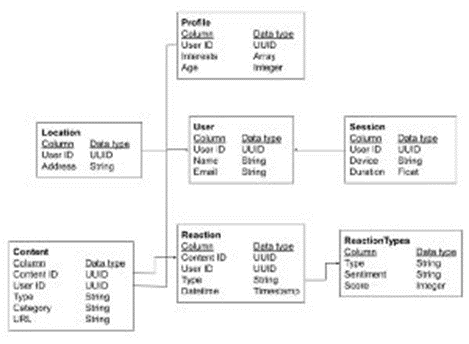

## **1. Data**
___

In [1]:
#import libraries
import pandas as pd

In [2]:
#pip install matplotlib
import matplotlib.pyplot as plt

In [3]:
#import data
SB_Content = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Content (1).csv")
SB_Location = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Location (1).csv")
SB_Profile = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Profile (1).csv")
SB_Reactions = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Reactions (1).csv")
SB_ReactionTypes = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\ReactionTypes (1).csv")
SB_Session = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Session (1).csv")
SB_User = pd.read_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\User (1).csv")

## **2. Cleaning**
___

### <font color=green>Merge Datasets</font>

In [4]:
df = SB_Reactions.merge(SB_ReactionTypes,left_on='Type',right_on='Type').merge(SB_Content,left_on='Content ID', right_on='Content ID',suffixes=('_FromReaction','_FromContent'))

### <font color=green>List all Column names</font>

In [5]:
list(df.columns)

['Unnamed: 0_x',
 'Content ID',
 'User ID_FromReaction',
 'Type_FromReaction',
 'Datetime',
 'Unnamed: 0_y',
 'Sentiment',
 'Score',
 'Unnamed: 0',
 'User ID_FromContent',
 'Type_FromContent',
 'Category',
 'URL']

### <font color=green>Drop columns</font>

In [6]:
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0','User ID_FromReaction'], axis=1)
df

,Content ID,Type_FromReaction,Datetime,Sentiment,Score,User ID_FromContent,Type_FromContent,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2020-11-09 02:49:59,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
...,...,...,...,...,...,...,...,...,...
24568,99fcc8a6-550f-47a1-b312-aba8a031f6c7,heart,2021-02-26 15:33:26,positive,60,084eb113-0d87-4ae5-891b-2ec7f1e194a8,video,travel,https://socialbuzz.cdn.com/content/storage/99f...
24569,004e820e-49c3-4ba2-9d02-62db0065410c,heart,2021-03-09 08:50:44,positive,60,9a5aca53-6263-485a-bf77-e60c4608fd26,audio,tennis,https://socialbuzz.cdn.com/content/storage/004...
24570,a7849ef3-5930-4ba9-9cbe-e215811e713e,heart,2020-09-26 22:01:17,positive,60,d9aab962-e964-4afd-83ee-abda0865da67,photo,studying,https://socialbuzz.cdn.com/content/storage/a78...
24571,e5f1a4c6-2b27-4c8b-ac9a-21bb6ef7c946,want,2021-02-12 11:54:33,positive,70,d27670c9-f85e-43e0-80a7-122cba908f10,audio,soccer,NaN


### <font color=green>Rename columns</font>

In [7]:
df.rename(columns={'User ID_FromContent': 'User ID', 'Type_FromContent': 'Content Type', 'Type_FromReaction': 'Reaction Type'}, inplace=True)

### <font color=green>Check if Index is unique</font>

In [8]:
for a in list(df.columns):
    print(a, df[a].is_unique)

Content ID False
Reaction Type False
Datetime False
Sentiment False
Score False
User ID False
Content Type False
Category False
URL False


### <font color=green>Check for Null values</font>

In [9]:
df.isnull().sum()

Content ID          0
Reaction Type       0
Datetime            0
Sentiment           0
Score               0
User ID             0
Content Type        0
Category            0
URL              4517
dtype: int64

### <font color=green>Check for Na values</font>

In [10]:
df.isna().cumsum()

,Content ID,Reaction Type,Datetime,Sentiment,Score,User ID,Content Type,Category,URL
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24568,0,0,0,0,0,0,0,0,4516
24569,0,0,0,0,0,0,0,0,4516
24570,0,0,0,0,0,0,0,0,4516
24571,0,0,0,0,0,0,0,0,4517


### <font color=green>Check for Duplicated rows in the entire dataframe</font>

In [11]:
df.duplicated(keep='first').sum()

0

In [12]:
df.duplicated(keep='first').value_counts()

False    24573
dtype: int64

### <font color=green>Remove Duplicated rows in the entire dataset</font>

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

### <font color=green>Check for Duplicated values per column</font>

In [15]:
for b in list(df.columns):
    print(b, df.duplicated(subset=[b], keep='first').sum())


Content ID 23611
Reaction Type 24557
Datetime 11
Sentiment 24570
Score 24558
User ID 24135
Content Type 24569
Category 24533
URL 23800


### <font color=green>Check for Unique values per row</font>

In [16]:
df.nunique(dropna=False)

Content ID         962
Reaction Type       16
Datetime         24562
Sentiment            3
Score               15
User ID            438
Content Type         4
Category            40
URL                773
dtype: int64

### <font color=green>Print unique values for certain columns</font>

In [17]:
[i for i in df['Category'].unique()]

['Studying',
 'healthy eating',
 'dogs',
 'public speaking',
 'science',
 'tennis',
 'food',
 'fitness',
 'soccer',
 'education',
 'studying',
 'travel',
 'veganism',
 'cooking',
 'technology',
 'animals',
 'culture',
 'Fitness',
 'Veganism',
 '"animals"',
 'Travel',
 '"soccer"',
 'Animals',
 'Education',
 '"dogs"',
 '"culture"',
 'Soccer',
 'Culture',
 'Food',
 '"technology"',
 '"cooking"',
 '"public speaking"',
 'Science',
 '"veganism"',
 'Public Speaking',
 '"science"',
 '"studying"',
 '"food"',
 'Healthy Eating',
 'Technology']

### <font color=green>Capitalize first letter of each word in a column</font>

In [18]:
df['Category'] = df['Category'].str.replace('"','')
df['Category'] = df['Category'].str.capitalize()
[i for i in df['Category'].unique()]

['Studying',
 'Healthy eating',
 'Dogs',
 'Public speaking',
 'Science',
 'Tennis',
 'Food',
 'Fitness',
 'Soccer',
 'Education',
 'Travel',
 'Veganism',
 'Cooking',
 'Technology',
 'Animals',
 'Culture']

### <font color=green>Get sum of scores per category</font>

In [114]:
scores = df.groupby('Category')['Score'].sum()
top5 = scores.sort_values(ascending=False)[:9]
top5 = top5.reset_index()
top5

,Category,Score
0,Animals,74965
1,Science,71168
2,Healthy eating,69339
3,Technology,68738
4,Food,66676
5,Culture,66579
6,Travel,64880
7,Cooking,64756
8,Soccer,57783


In [115]:
top5['Percentage'] = top5['Score']/df['Score'].sum()*100
top5

,Category,Score,Percentage
0,Animals,74965,7.699418
1,Science,71168,7.309440
2,Healthy eating,69339,7.121589
3,Technology,68738,7.059863
4,Food,66676,6.848081
5,Culture,66579,6.838119
6,Travel,64880,6.663620
7,Cooking,64756,6.650884
8,Soccer,57783,5.934709


### <font color=green>Export Dataframe</font>

In [20]:
df.to_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\Dataframe.csv")

In [21]:
top5.to_csv(r"C:\Users\bongi\OneDrive\Bongiwe_Documents\Academics\Forage\Task 1\Data\5topScores.csv")

## **3. Description**
___

### <font color=green>Create a year, month and day </font>

In [22]:
#Split the 'Datetime' column into three columns
YearMonth = df['Datetime'].str.split("-",expand=True)
YearMonth

,0,1,2
0,2020,11,07 09:43:50
1,2021,01,06 19:13:01
2,2021,04,09 02:46:20
3,2021,06,17 12:22:51
4,2020,11,09 02:49:59
...,...,...,...
24568,2021,02,26 15:33:26
24569,2021,03,09 08:50:44
24570,2020,09,26 22:01:17
24571,2021,02,12 11:54:33


### <font color=green>Add year, month and day to dataset</font>

In [23]:
#Add a 'Year' column to the dataframe
df['Year'] = YearMonth[0]

#Add a 'Month' column to the dataframe
df['Month'] = YearMonth[1]

#Add a 'Day' column to the dataframe
Day = YearMonth[2].str.split(" ",expand=True)
df['Day'] = Day[0]

### <font color=green>Groupby categories by months  </font>

In [24]:
#(1) Group dataframe by 'Category', 'Year' and 'Month', (2) sum the scores, and (3) create a new dataframe
category_score_monthly = df.groupby(['Category','Year','Month'])['Score'].sum()

#reset the index
category_score_monthly = category_score_monthly.reset_index()
category_score_monthly

,Category,Year,Month,Score
0,Animals,2020,06,3452
1,Animals,2020,07,4820
2,Animals,2020,08,5765
3,Animals,2020,09,6138
4,Animals,2020,10,6271
...,...,...,...,...
203,Veganism,2021,02,3626
204,Veganism,2021,03,3637
205,Veganism,2021,04,4930
206,Veganism,2021,05,4184


### <font color=green>Animal trend  </font>

In [64]:
#Animal - group category by 'Year' and 'Month'
animals = category_score_monthly[category_score_monthly['Category']==top5.iloc[0,0]]

#Animal - create a new moth-year column named 'Period'
animals['Period'] = animals[['Year','Month']].agg('-'.join, axis=1)
animals

C:\Users\bongi\AppData\Local\Temp\ipykernel_3404\4054841844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animals['Period'] = animals[['Year','Month']].agg('-'.join, axis=1)


,Category,Year,Month,Score,Period
0,Animals,2020,06,3452,2020-06
1,Animals,2020,07,4820,2020-07
2,Animals,2020,08,5765,2020-08
3,Animals,2020,09,6138,2020-09
4,Animals,2020,10,6271,2020-10
5,Animals,2020,11,7023,2020-11
6,Animals,2020,12,6477,2020-12
7,Animals,2021,01,7072,2021-01
8,Animals,2021,02,5376,2021-02
9,Animals,2021,03,5202,2021-03


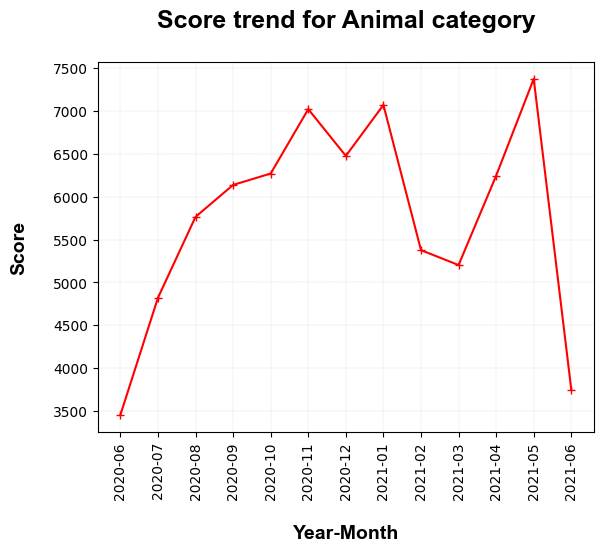

In [80]:
#create line graph
plt.figure(1)

#define line graph
plt.plot(animals['Period'], animals['Score'], color='red', marker='+')

#title
plt.title('Score trend for Animal category', fontsize=18, weight='semibold',pad=25, family='Arial')

#x and y labels
plt.xlabel('Year-Month', fontsize=14, weight='semibold', labelpad=18, family='Arial')
plt.ylabel('Score', fontsize=14, weight='semibold', labelpad=18, family='Arial')

#vertical labels on x-axis
plt.xticks(rotation=90)

#show grid lines
plt.grid(True, color='grey', linestyle='--', linewidth = 0.1)

#show line graph
plt.show()

### <font color=green>Science trend  </font>

In [ ]:
#Science - group category by 'Year' and 'Month'
science = category_score_monthly[category_score_monthly['Category']==top5.iloc[1,0]]

#Science - create a new moth-year column named 'Period'
science['Period'] = science[['Year','Month']].agg('-'.join, axis=1)
science

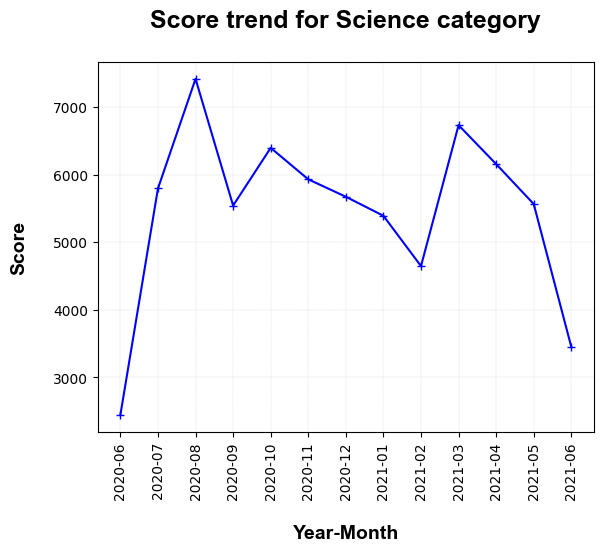

In [78]:
#create line graph
plt.figure(2)

#define line graph
plt.plot(science['Period'], science['Score'], color='blue', marker='+')

#title
plt.title('Score trend for Science category', fontsize=18, weight='semibold',pad=25, family='Arial')

#x and y labels
plt.xlabel('Year-Month', fontsize=14, weight='semibold', labelpad=18, family='Arial')
plt.ylabel('Score', fontsize=14, weight='semibold', labelpad=18, family='Arial')

#vertical labels on x-axis
plt.xticks(rotation=90)

#show grid lines
plt.grid(True, color='grey', linestyle='--', linewidth = 0.1)

#show line graph
plt.show()

### <font color=green>Healthy Eating trend  </font>

In [ ]:
#Healthy Eating - group category by 'Year' and 'Month'
healthy_eating = category_score_monthly[category_score_monthly['Category']==top5.iloc[2,0]]

#Healthy Eating - create a new moth-year column named 'Period'
healthy_eating['Period'] = healthy_eating[['Year','Month']].agg('-'.join, axis=1)
healthy_eating

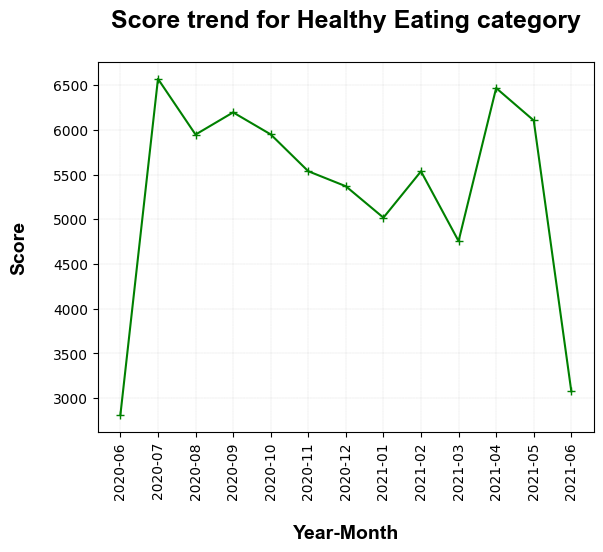

In [79]:
#create line graph
plt.figure(3)

#define line graph
plt.plot(healthy_eating['Period'], healthy_eating['Score'], color='green', marker='+')

#title
plt.title('Score trend for Healthy Eating category', fontsize=18, weight='semibold',pad=25, family='Arial')

#x and y labels
plt.xlabel('Year-Month', fontsize=14, weight='semibold', labelpad=18, family='Arial')
plt.ylabel('Score', fontsize=14, weight='semibold', labelpad=18, family='Arial')

#vertical labels on x-axis
plt.xticks(rotation=90)

#show grid lines
plt.grid(True, color='grey', linestyle='--', linewidth = 0.1)

#show line graph
plt.show()

### <font color=green>Technology trend  </font>

In [36]:
#Technology - group category by 'Year' and 'Month'
technology = category_score_monthly[category_score_monthly['Category']==top5.iloc[3,0]]

#Technology - create a new moth-year column named 'Period'
technology['Period'] = technology[['Year','Month']].agg('-'.join, axis=1)
technology

C:\Users\bongi\AppData\Local\Temp\ipykernel_3404\3405162487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technology['Period'] = technology[['Year','Month']].agg('-'.join, axis=1)


,Category,Year,Month,Score,Period
156,Technology,2020,06,2047,2020-06
157,Technology,2020,07,6885,2020-07
158,Technology,2020,08,5322,2020-08
159,Technology,2020,09,5964,2020-09
160,Technology,2020,10,5548,2020-10
161,Technology,2020,11,5307,2020-11
162,Technology,2020,12,4749,2020-12
163,Technology,2021,01,5624,2021-01
164,Technology,2021,02,6453,2021-02
165,Technology,2021,03,5147,2021-03


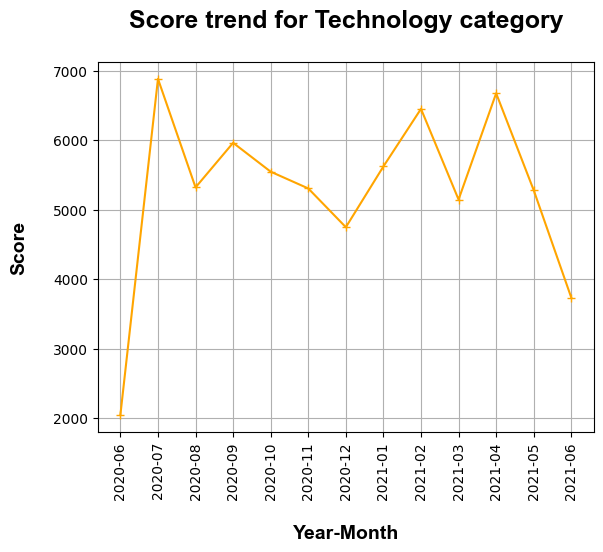

In [56]:
#create line graph
plt.figure(4)

#define line graph
plt.plot(technology['Period'], technology['Score'], color='orange', marker='+')

#title
plt.title('Score trend for Technology category', fontsize=18, weight='semibold',pad=25, family='Arial')

#x and y labels
plt.xlabel('Year-Month', fontsize=14, weight='semibold', labelpad=18, family='Arial')
plt.ylabel('Score', fontsize=14, weight='semibold', labelpad=18, family='Arial')

#vertical labels on x-axis
plt.xticks(rotation=90)

#show grid lines
plt.grid(True, color='grey', linestyle='--', linewidth = 0.1)

#show line graph
plt.show()

### <font color=green>Food trend  </font>

In [39]:
#food - group category by 'Year' and 'Month'
food = category_score_monthly[category_score_monthly['Category']==top5.iloc[4,0]]

#Food - create a new moth-year column named 'Period'
food['Period'] = food[['Year','Month']].agg('-'.join, axis=1)
food

C:\Users\bongi\AppData\Local\Temp\ipykernel_3404\4054257650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food['Period'] = food[['Year','Month']].agg('-'.join, axis=1)


,Category,Year,Month,Score,Period
78,Food,2020,06,1962,2020-06
79,Food,2020,07,5247,2020-07
80,Food,2020,08,5942,2020-08
81,Food,2020,09,4939,2020-09
82,Food,2020,10,6183,2020-10
83,Food,2020,11,6307,2020-11
84,Food,2020,12,5051,2020-12
85,Food,2021,01,5367,2021-01
86,Food,2021,02,5297,2021-02
87,Food,2021,03,5674,2021-03


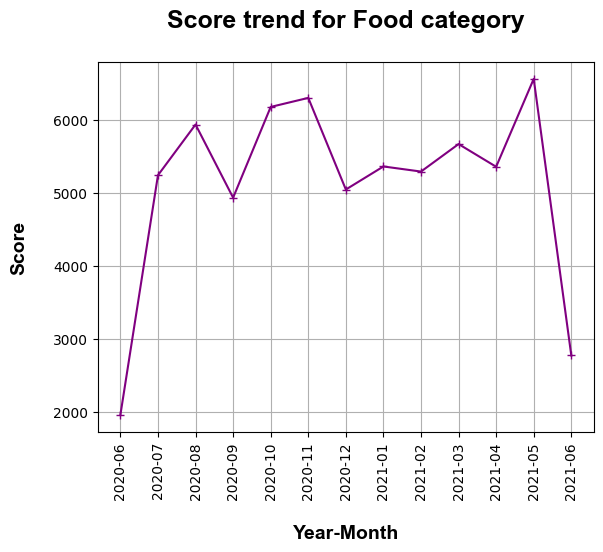

In [55]:
#create line graph
plt.figure(5)

#define line graph
plt.plot(food['Period'], food['Score'], color='purple', marker='+')

#title
plt.title('Score trend for Food category', fontsize=18, weight='semibold',pad=25, family='Arial')

#x and y labels
plt.xlabel('Year-Month', fontsize=14, weight='semibold', labelpad=18, family='Arial')
plt.ylabel('Score', fontsize=14, weight='semibold', labelpad=18, family='Arial')

#vertical labels on x-axis
plt.xticks(rotation=90)

#show grid lines
plt.grid(True, color='grey', linestyle='--', linewidth = 0.1)

#show line graph
plt.show()

### <font color=green>Graph of the top 5 Categories  </font>

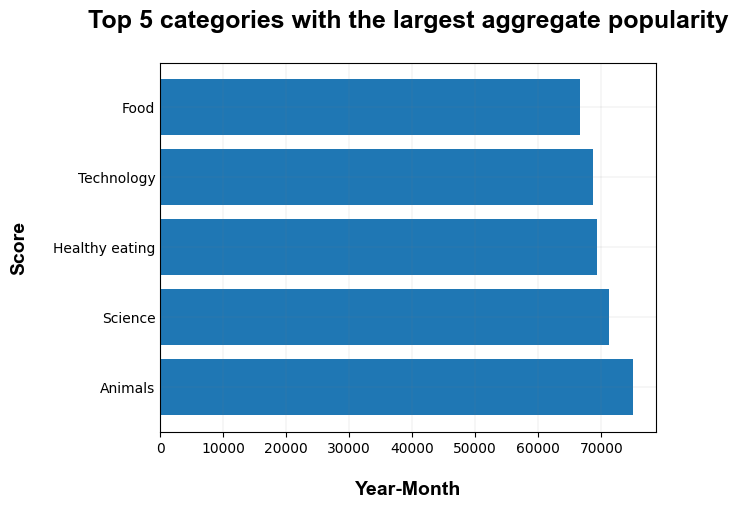

In [99]:
#create line graph
plt.figure(6)

#bar graph
plt.barh(top5['Category'], top5['Score'])

#title
plt.title('Top 5 categories with the largest aggregate popularity', fontsize=18, weight='semibold',pad=25, family='Arial')

#x and y labels
plt.xlabel('Year-Month', fontsize=14, weight='semibold', labelpad=18, family='Arial')
plt.ylabel('Score', fontsize=14, weight='semibold', labelpad=18, family='Arial')

#Remove y Ticks
plt.tick_params(axis='y', length = 0)

#add grey grid lines
plt.grid(visible = True, which='both', c='grey', lw=0.1)

#show bar graph
plt.show()